In [68]:
# importing all the neccessary libraries for this project

import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [69]:
train = pd.read_csv('Desktop/DATA HUB/train.csv')
test = pd.read_csv('Desktop/DATA HUB/test.csv')
train.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [14]:
# checking missing values
train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [15]:
# checking the description of the data
train.describe()

id  Air temperature [K]  Process temperature [K]  \
count  136429.000000        136429.000000            136429.000000   
mean    68214.000000           299.862776               309.941070   
std     39383.804275             1.862247                 1.385173   
min         0.000000           295.300000               305.800000   
25%     34107.000000           298.300000               308.700000   
50%     68214.000000           300.000000               310.000000   
75%    102321.000000           301.200000               310.900000   
max    136428.000000           304.400000               313.800000   

       Rotational speed [rpm]    Torque [Nm]  Tool wear [min]  \
count           136429.000000  136429.000000    136429.000000   
mean              1520.331110      40.348643       104.408901   
std                138.736632       8.502229        63.965040   
min               1181.000000       3.800000         0.000000   
25%               1432.000000      34.600000        48.000000   
50%               1493.000000      40.400000       106.000000   
75%               1580.000000      46.100000       159.000000   
max               2886.000000      76.600000       253.000000   

       Machine failure            TWF            HDF            PWF  \
count    136429.000000  136429.000000  136429.000000  136429.000000   
mean          0.015744       0.001554       0.005160       0.002397   
std           0.124486       0.039389       0.071649       0.048899   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       0.000000   
50%           0.000000       0.000000       0.000000       0.000000   
75%           0.000000       0.000000       0.000000       0.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 OSF            RNF  
count  136429.000000  136429.000000  
mean        0.003958       0.002258  
std         0.062789       0.047461  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [26]:
# Check data types of columns
print(train.dtypes)

# Select only numeric columns for correlation
numeric_cols = train.select_dtypes(include=[np.number]).columns
print(numeric_cols)


id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object
Index(['id', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [28]:
# Select only numeric columns for heatmap
train_numeric = train[numeric_cols]


In [61]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to non-numeric columns (example)
le = LabelEncoder()
train['id'] = le.fit_transform(train['id'])

# Or use one-hot encoding for categorical variables
train = pd.get_dummies(train, drop_first=True)


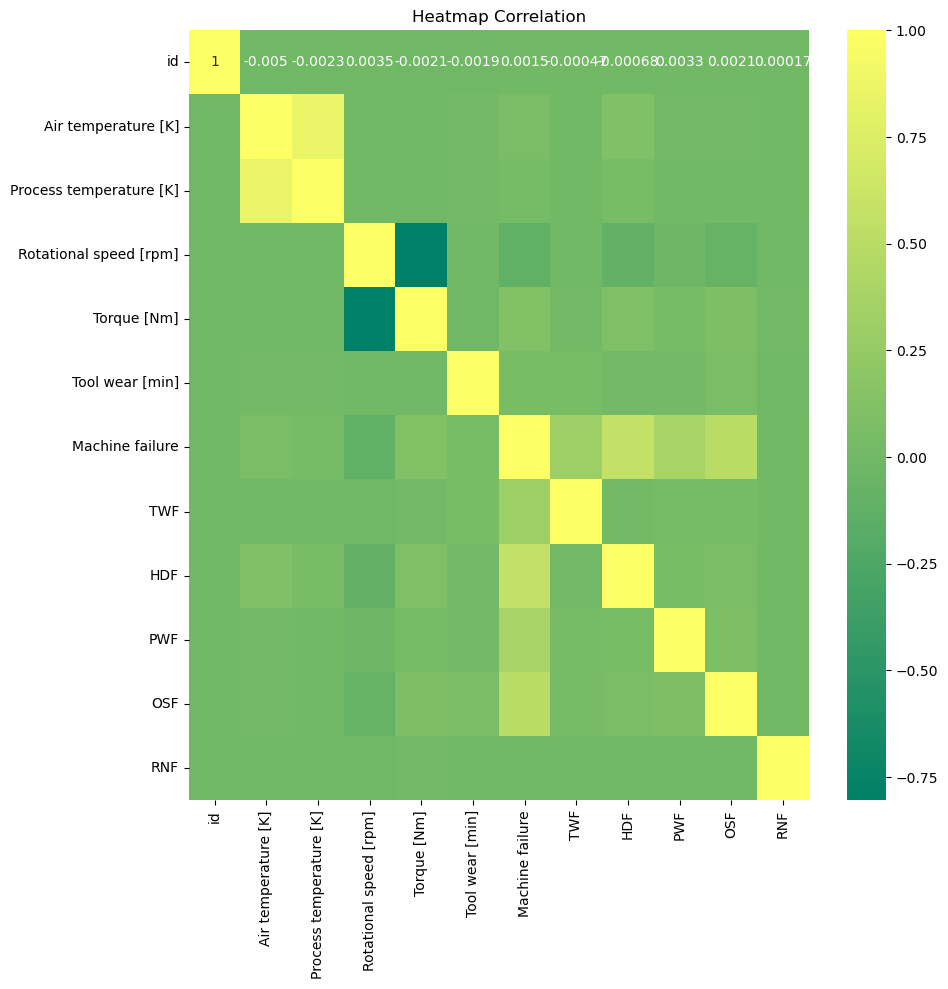

In [31]:
# Generate the heatmap using only numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(train_numeric.corr(method='spearman'), annot=True, cmap='summer')
plt.title('Heatmap Correlation')
plt.show()


In [32]:

fig, axes = plt.subplots(2, 5, figsize=[25,15])
j = 0
colors = ['yellow', 'green']

for i in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data=train, x=i, kde=True, ax=axes[0,j], hue='Machine failure', palette=colors)
    sns.boxplot(data=train, x=i, ax=axes[1,j], palette=['#006400'])
    j+=1
    print('{} skewness = {}'.format(i, round(train[i].skew(), 2)))

Air temperature [K] skewness = 0.16
Process temperature [K] skewness = 0.06
Rotational speed [rpm] skewness = 1.89
Torque [Nm] skewness = -0.03
Tool wear [min] skewness = -0.03


In [113]:


# Scatter Plot pada masing-masing fitur numerik
plt.rcParams["figure.figsize"] = (25,30)

plt.subplot(5,2,1)
plt.title('Scatter Plot Air temperature [K] vs Process temperature [K]')
sns.scatterplot(data=train, x='Air temperature [K]', y='Process temperature [K]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,2)
plt.title('Scatter Plot Air temperature [K] vs Rotational speed')
sns.scatterplot(data=train, x='Air temperature [K]', y='Rotational speed [rpm]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,3)
plt.title('Scatter Plot Air temperature [K] vs Torque')
sns.scatterplot(data=train, x='Air temperature [K]', y='Torque [Nm]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,4)
plt.title('Scatter Plot Air temperature [K] vs Tool wear [min]')
sns.scatterplot(data=train, x='Air temperature [K]', y='Tool wear [min]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,5)
plt.title('Scatter Plot Process temperature [K] vs Rotational speed [rpm]')
sns.scatterplot(data=train, x='Process temperature [K]', y='Rotational speed [rpm]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,6)
plt.title('Scatter Plot Process temperature [K] vs Torque')
sns.scatterplot(data=train, x='Process temperature [K]', y='Torque [Nm]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,7)
plt.title('Scatter Plot Process temperature [K] vs Tool wear [min]')
sns.scatterplot(data=train, x='Process temperature [K]', y='Tool wear [min]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,8)
plt.title('Scatter Plot Rotational speed vs Torque')
sns.scatterplot(data=train, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,9)
plt.title('Scatter Plot Rotational speed vs Tool wear [min]')
sns.scatterplot(data=train, x='Rotational speed [rpm]', y='Tool wear [min]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

plt.subplot(5,2,10)
plt.title('Scatter Plot Torque [Nm] vsTool wear [min]')
sns.scatterplot(data=train, x='Torque [Nm]', y='Tool wear [min]', hue='Machine failure', palette=['#FFD700', '#006400'])
plt.grid()

In [71]:
#import library
from scipy.stats import norm

#splitting dataset
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

#resampling
from sklearn.utils import resample

#Cross Validation
from sklearn.model_selection import KFold

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [75]:
categorical_val = ['Type']
engine = pd.get_dummies(train, columns = categorical_val)
engine.head()


id Product ID  Air temperature [K]  Process temperature [K]  \
0   0     L50096                300.6                    309.6   
1   1     M20343                302.6                    312.1   
2   2     L49454                299.3                    308.5   
3   3     L53355                301.0                    310.9   
4   4     M24050                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  Type_H  Type_L  Type_M  
0    0    0    0    0   False    True   False  
1    0    0    0    0   False   False    True  
2    0    0    0    0   False    True   False  
3    0    0    0    0   False    True   False  
4    0    0    0    0   False   False    True

In [76]:
X = engine.drop(['Machine failure', 'Product ID'], axis = 1)
y = engine['Machine failure']

In [77]:
X.columns = ['id','Air_temperature_K', 'Process_temperature_K',
       'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF','Type_H', 'Type_L', 'Type_M']

In [80]:
# spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [81]:
# Apply Box-Cox transformation to selected columns in train and test datasets
columns_to_transform = ['Rotational_speed_rpm', 'Torque_Nm']
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
X_train[columns_to_transform] = boxcox_transformer.fit_transform(X_train[columns_to_transform])
X_test[columns_to_transform] = boxcox_transformer.transform(X_test[columns_to_transform])

In [83]:
number = ['Air_temperature_K', 'Process_temperature_K','Rotational_speed_rpm',
       'Torque_Nm', 'Tool_wear_min']

In [87]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[number] = sc.fit_transform(X_train[number])
X_test[number] = sc.transform(X_test[number])

In [88]:
from imblearn.combine import SMOTEENN

# create the over-sampling and under-sampling object
smote_enn = SMOTEENN(sampling_strategy = 0.8, random_state=42)

# resample the data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [90]:
# checking for the machine failure using value counts
y_resampled.value_counts()

Machine failure
1    52922
0    52714
Name: count, dtype: int64

In [91]:
lr=LogisticRegression()
lr.fit(X_resampled,y_resampled)

LogisticRegression()

In [92]:
#Prediction of the test variable
lr_y_preds=lr.predict(X_test)

In [93]:
#Training score
print("Training Score :", lr.score(X_resampled,y_resampled))
print("Testing Score :", lr.score(X_test,y_test))

Training Score : 0.8094115642394638
Testing Score : 0.6713699332991278


In [94]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     26848
           1       0.04      0.83      0.08       438

    accuracy                           0.67     27286
   macro avg       0.52      0.75      0.44     27286
weighted avg       0.98      0.67      0.79     27286



In [95]:
Accuracies= {} # make dictionry to save all accuracies models

# define model
lg = LogisticRegression()

# parameters
parameters=[{'penalty':['l1','l2'],'C':np.logspace(-2,2,40), 'solver':['liblinear','saga']}]

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

#define search
search = GridSearchCV(lg, parameters, cv=folds, refit=True, verbose=2, scoring='f1', n_jobs=-1 )

# execute search
result = search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [97]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9016476637747649
Best Hyperparameters: {'C': 9.426684551178854, 'penalty': 'l1', 'solver': 'liblinear'}


In [99]:
Logreg = LogisticRegression(C =  62.355073412739124, penalty = 'l2' , solver = 'liblinear')
Logreg.fit(X_resampled,y_resampled)

y_pred_log=Logreg.predict(X_test)

In [101]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     26848
           1       0.09      0.82      0.16       438

    accuracy                           0.87     27286
   macro avg       0.54      0.84      0.55     27286
weighted avg       0.98      0.87      0.92     27286



In [102]:
cm = confusion_matrix(y_test, y_pred_log)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

In [103]:
# make function to draw the plot ROC to easly
def plot_roc_(fpr,tpr,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

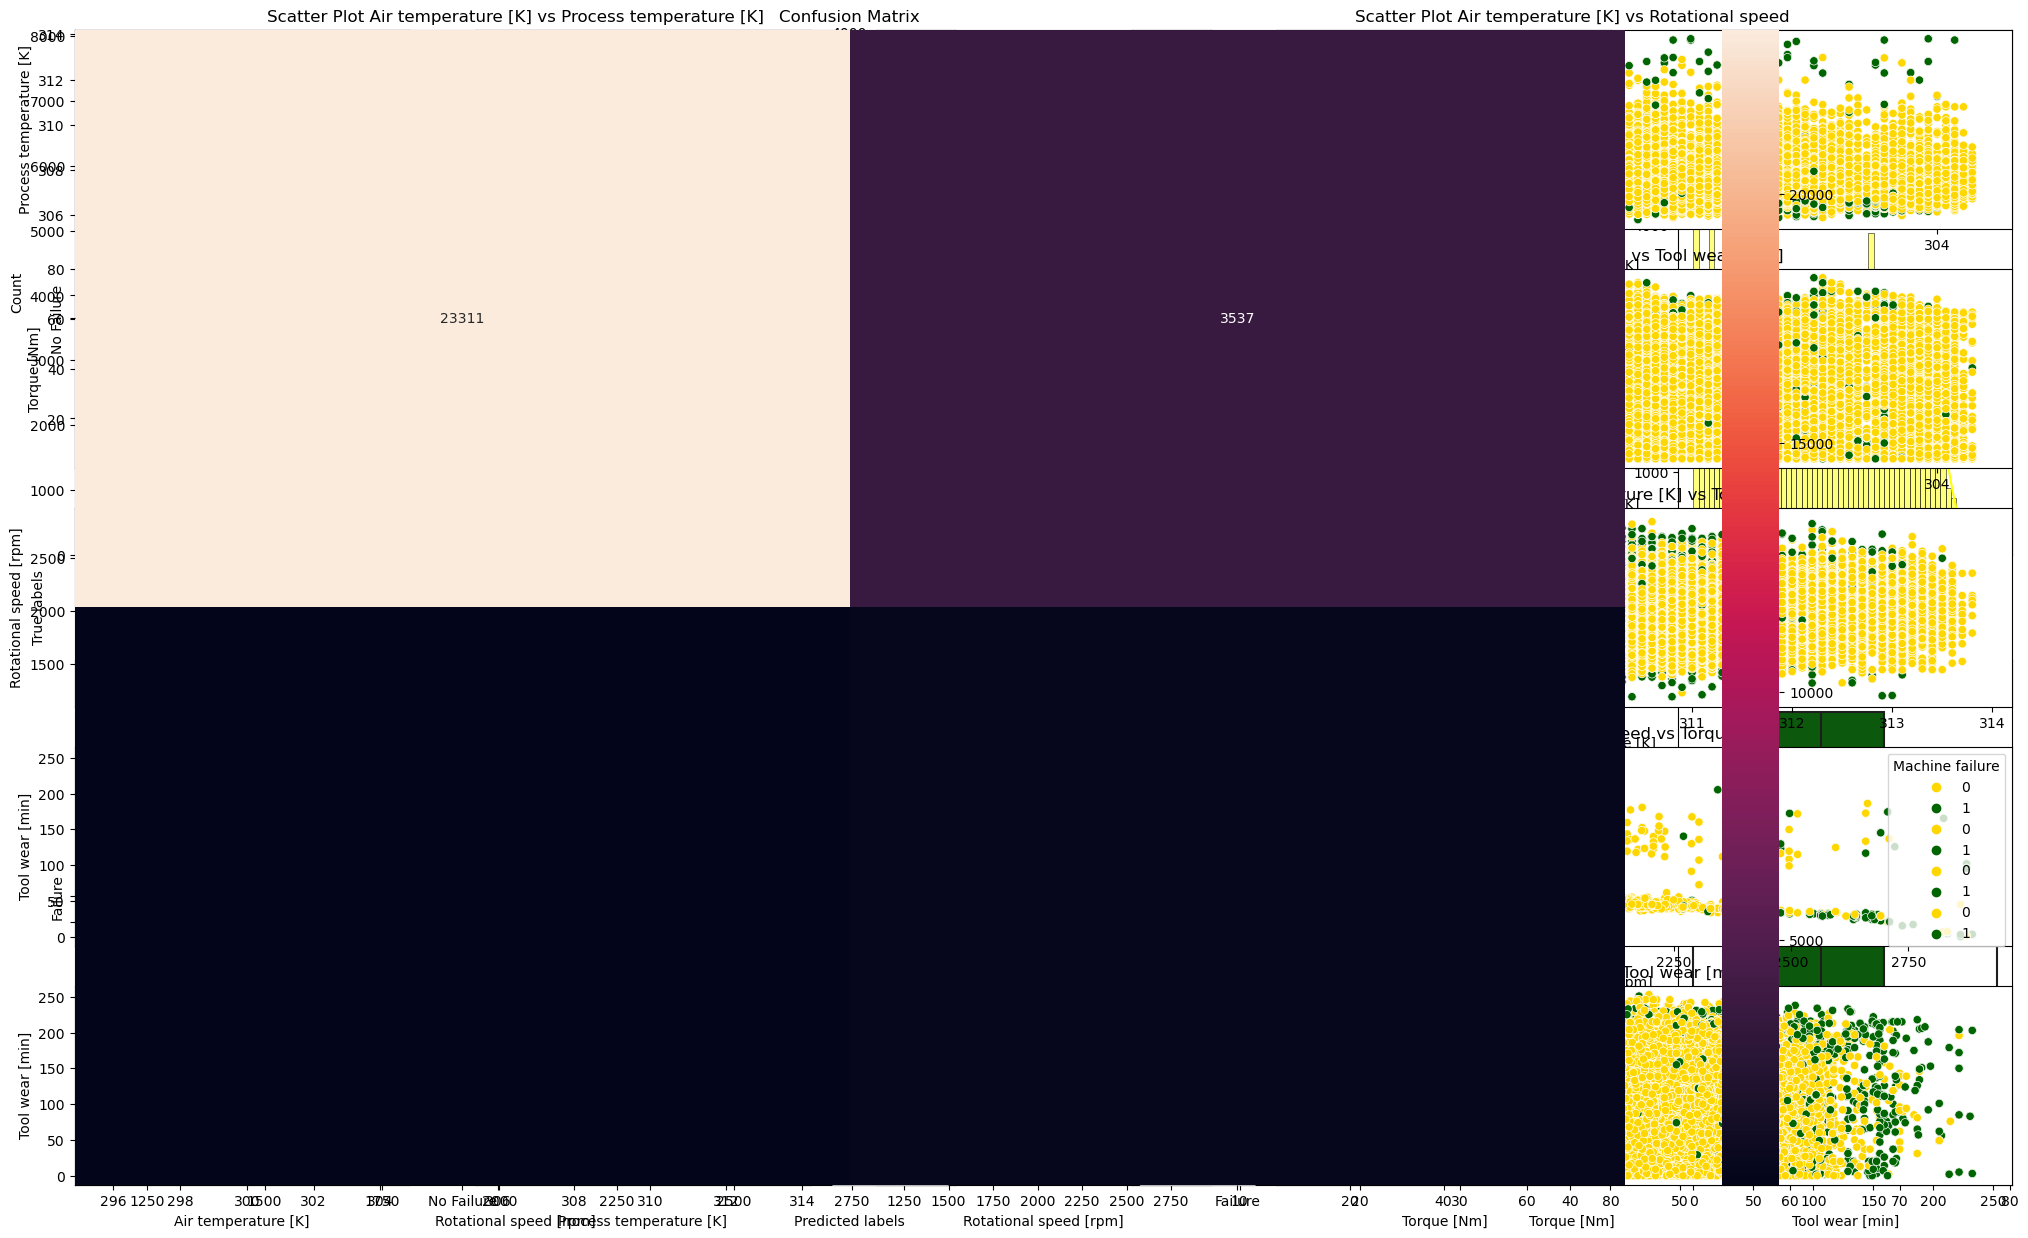

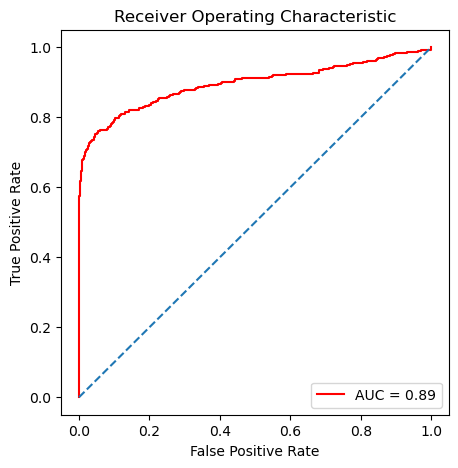

In [104]:
#ROC Curve
y_proba_log=Logreg.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_log[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)

In [107]:
from sklearn.svm import SVC
model_sv = SVC(probability=True)
model_sv.fit(X_resampled, y_resampled) # Train/Fit model

# get y predictions
y_pred_sv= model_sv.predict(X_test)

# output accuracymodel_sv = SVC(probability=True)
print(classification_report(y_test, y_pred_sv)) 

# Train/Fit model
model_sv.fit(X_resampled, y_resampled) 

# get y predictions
y_pred_sv= model_sv.predict(X_test)

# output accuracy
print(classification_report(y_test, y_pred_sv)) 

              precision    recall  f1-score   support

           0       0.98      0.31      0.47     26848
           1       0.02      0.70      0.03       438

    accuracy                           0.32     27286
   macro avg       0.50      0.50      0.25     27286
weighted avg       0.97      0.32      0.47     27286

              precision    recall  f1-score   support

           0       0.98      0.31      0.47     26848
           1       0.02      0.70      0.03       438

    accuracy                           0.32     27286
   macro avg       0.50      0.50      0.25     27286
weighted avg       0.97      0.32      0.47     27286



In [109]:
print("Training Score :", model_sv.score(X_resampled,y_resampled))
print("Testing Score :", model_sv.score(X_test,y_test))

Training Score : 0.5269510394183801
Testing Score : 0.3174521732756725


In [110]:
cm = confusion_matrix(y_test, y_pred_sv)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No Failure', 'Failure']); ax.yaxis.set_ticklabels(['No Failure', 'Failure']);

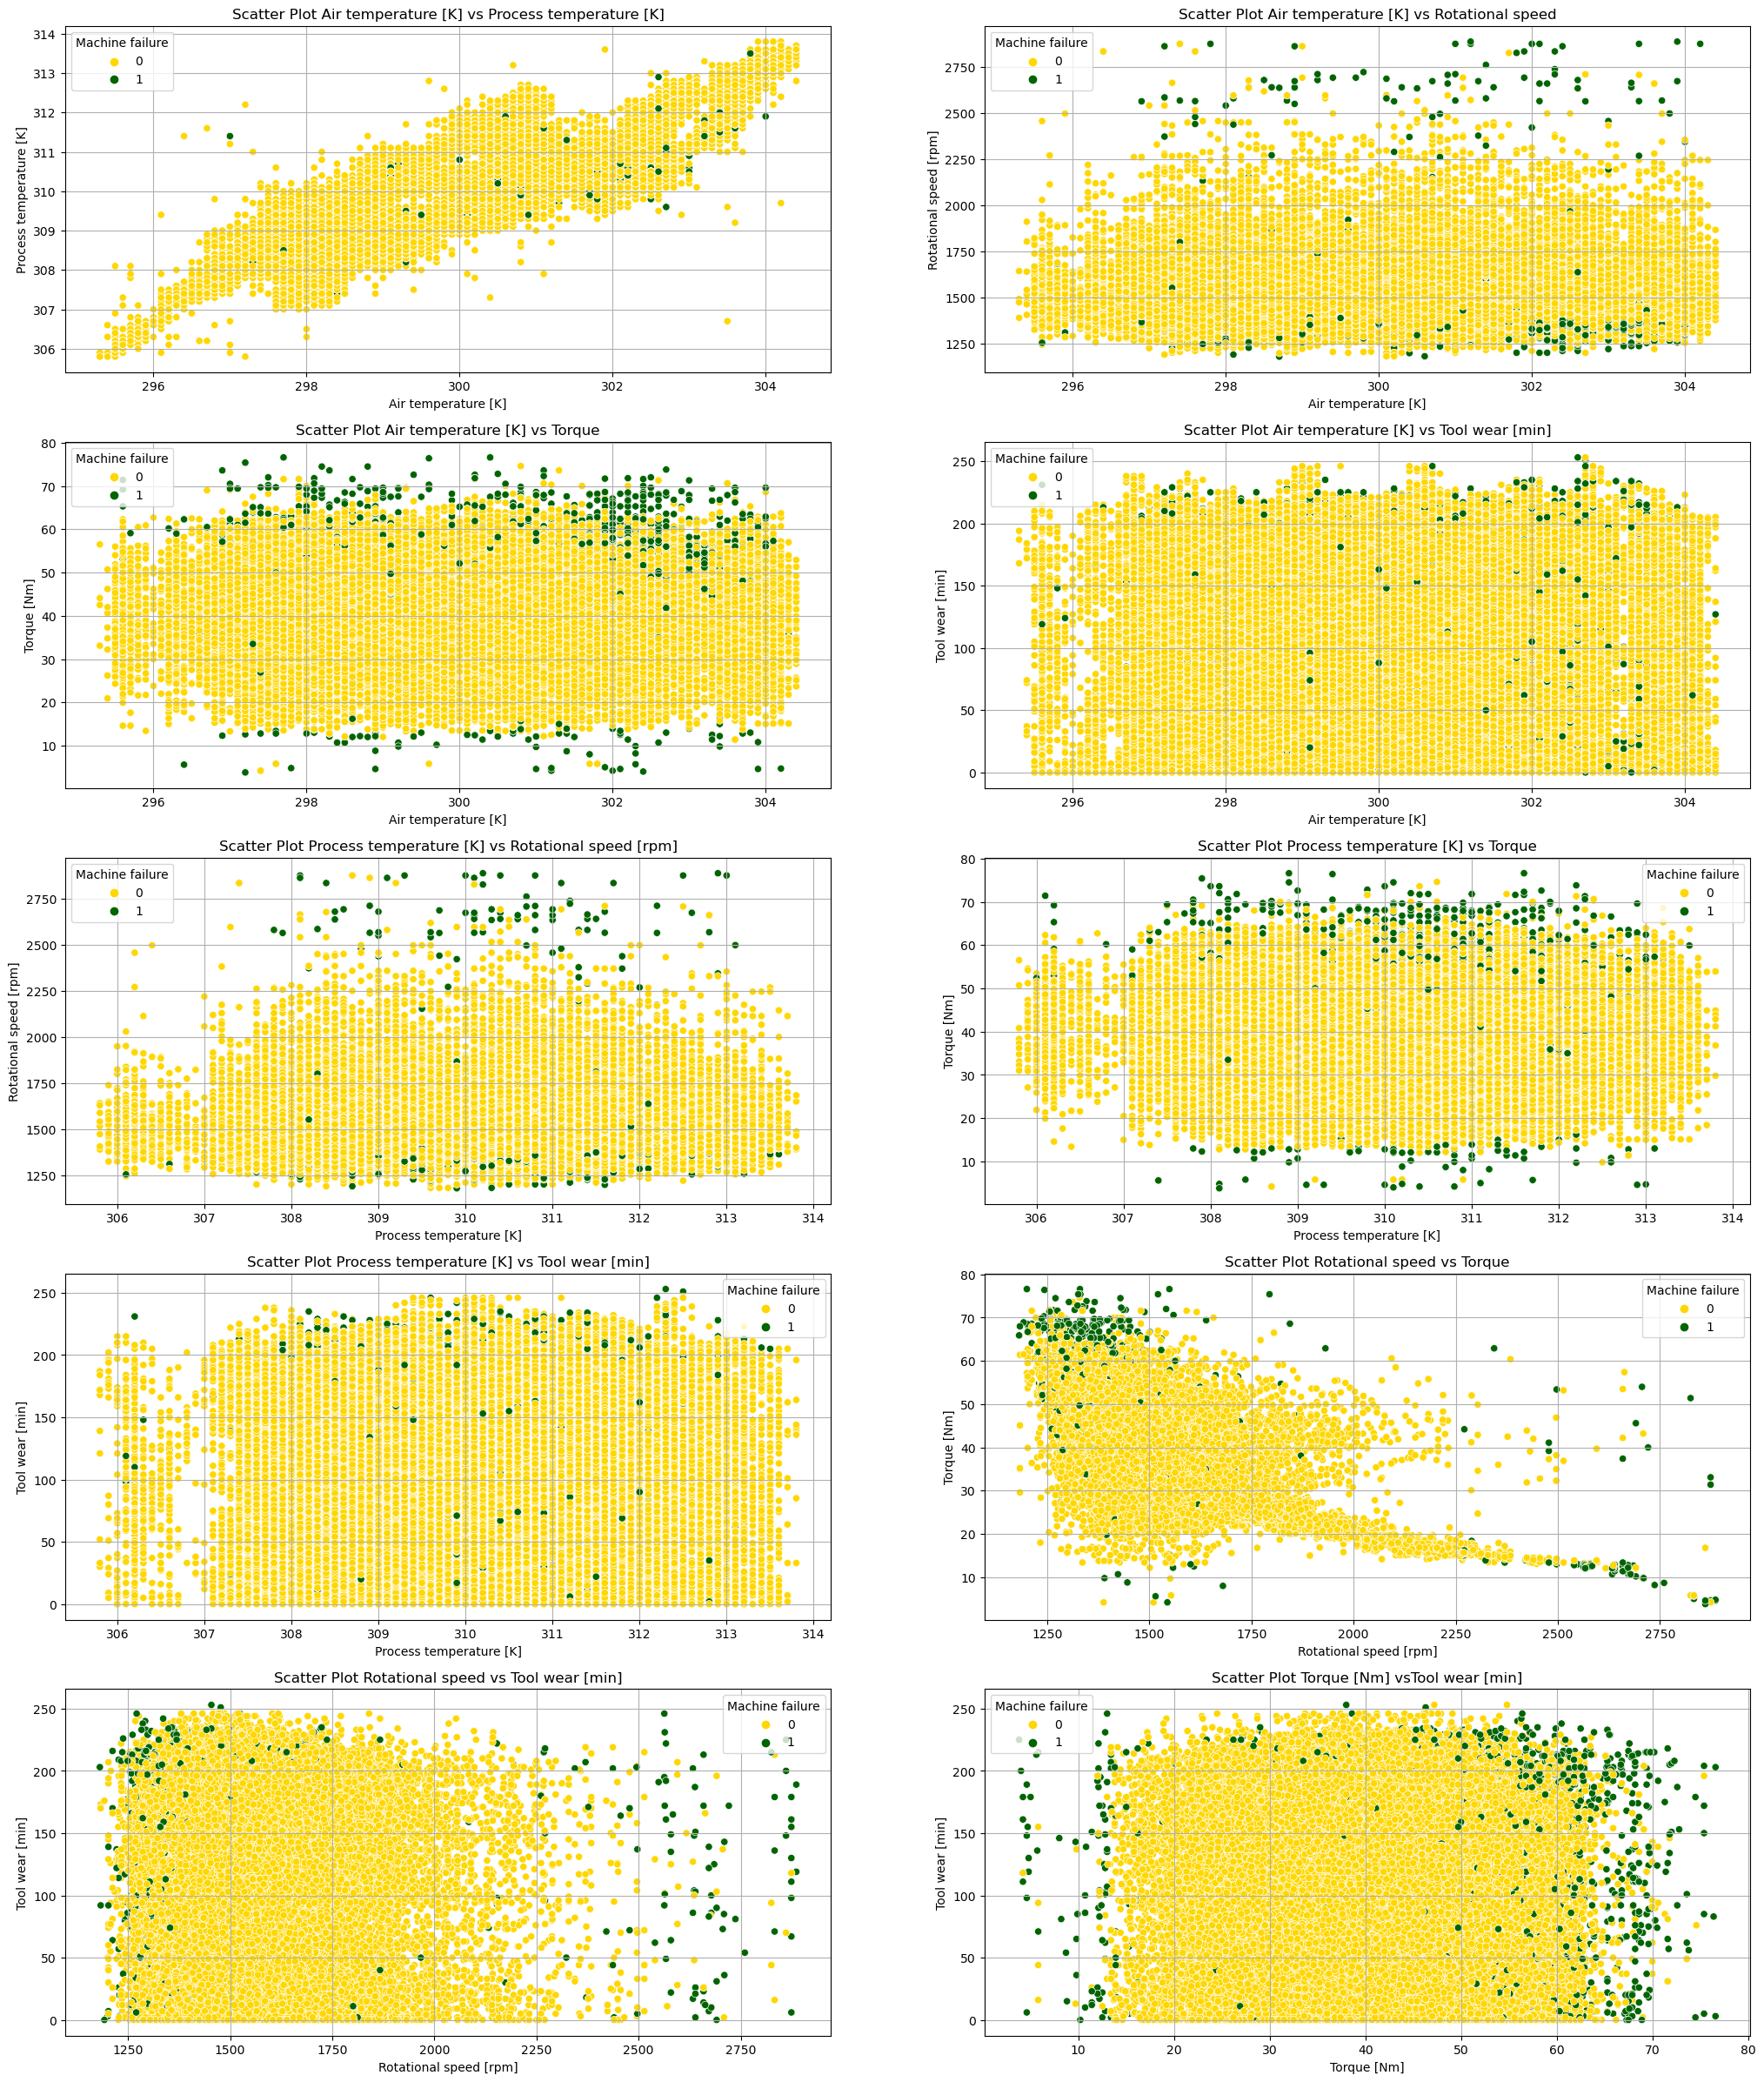

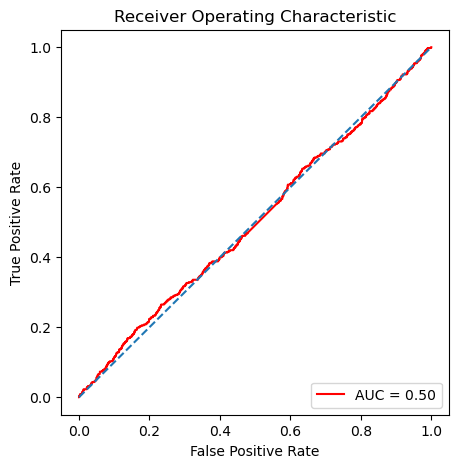

In [114]:
y_proba_svm=model_sv.predict_proba(X_test)

#Sensitivity= TP / TP + FN
#Specificity= TN / TN + FP
fpr_b, tpr_b, thresholds_b = roc_curve(y_test,y_proba_svm[:,1])
roc_auc_b = auc(fpr_b, tpr_b)
plot_roc_(fpr_b,tpr_b,roc_auc_b)